#1　はじめに
　本文は、青山大学社会情報学部１年生212名を対象とした2019年度生活時間調査データにもとづき、寺尾敦（2012）の分析を参考にする。本文の目的は、2019年度学生の学習時間の実態を把握することと、学生生活における他の変数との関連を明らかにすることである。このうえで、１年生119名を対象とした2012年度調査データと2019年度調査データを組み合わせて分析する。

　各セクションでは、まず結果を説明するテキストがあり、次に2019年度のデータを分析するためのコードがあり、最後に年度別比較分析のためのコードがある。

　注：

　1.レポート本文と分析手法、結果が１つにまとまるために、図形などの中で日本語を入力した。

　2.性別の違いは本文での関心からもはずれるので、しばらく検討しない。

　3.あらかじめ左側のファイルにslife2019.csvとAJSI.xlsx を追加しておく必要がある。

In [ ]:
data9 = read.table( file = "slife2019.csv", header=T, sep = ",", stringsAsFactors = F )
str(data9)
install.packages( "openxlsx" )
library( openxlsx )
data2 = read.xlsx( "AJSI.xlsx",7 )
str(data2)

'data.frame':	212 obs. of  13 variables:
 $ SID      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ sleep    : int  6 6 8 6 7 7 6 5 5 6 ...
 $ job      : int  5 0 12 1 8 0 0 6 12 9 ...
 $ club     : int  0 48 4 1 12 2 2 1 5 2 ...
 $ wday_work: num  5 2 1 2 3 1 0 3 0 1 ...
 $ wday_self: num  1 0.5 0 0 3 0.5 0 1 0.5 0 ...
 $ wed_work : num  2 0.5 0 3 3 1.5 0 2 0.5 3 ...
 $ wed_self : num  0.5 0.5 0 0 1 1 0 1 0.5 0 ...
 $ end_work : num  4.5 0.5 0 3 0.5 1 0 3.5 0 3 ...
 $ end_self : num  0 0.5 0 0 1 1 0 1 0 0 ...
 $ total1   : int  5 2 4 5 6 4 1 5 6 5 ...
 $ total2   : int  4 3 1 4 6 3 1 2 5 3 ...
 $ sex      : chr  "m" "m" "m" "f" ...


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



'data.frame':	119 obs. of  15 variables:
 $ SID      : num  1 2 3 4 5 6 7 8 9 10 ...
 $ group    : num  1 1 2 1 1 2 1 1 2 1 ...
 $ sex      : chr  "m" "m" "m" "m" ...
 $ sleep_day: num  7 5 4 6 5 6 4 6 5 6 ...
 $ job_week : num  0 0 0 0 4 0 0 0 30 0 ...
 $ club_week: num  5 16 2 2 3 4 9 4 5 9 ...
 $ wday_work: num  0 0 3 0 2 2 4 0 0.5 3 ...
 $ wday_self: num  0 0 1 0 2 0 1 0 0 0 ...
 $ wed_work : num  0 0 3.5 0 2 2 5 0 0 1 ...
 $ wed_self : num  0 0 0.5 0 1 0 3 0 0 0 ...
 $ wend_work: num  0 0 3 0 1 0.5 4 0 0.5 2.5 ...
 $ wend_self: num  0 0 0.5 0 1 0 1 0 0 0 ...
 $ satisfy_1: num  2 1 5 1 5 4 4 3 5 3 ...
 $ satisfy_2: num  1 2 5 1 1 4 3 3 2 2 ...
 $ 睡眠時間 : num  1 2 3 4 5 6 7 8 9 10 ...


In [ ]:
#準備　追加されたデータは0・5の倍数の形で保持される
twork9=round((data9$wday_work*4+data9$wed_work+data9$end_work*2)/0.5,0)*0.5
tself9=round((data9$wday_self*4+data9$wed_self+data9$end_self*2)/0.5,0)*0.5
twork2=round((data2$wday_work*4+data2$wed_work+data2$wend_work*2)/0.5,0)*0.5
tself2=round((data2$wday_self*4+data2$wed_self+data2$wend_self*2)/0.5,0)*0.5
dw9=round((tself9+twork9)/(7*0.5),0)*0.5
dw2=round((tself2+twork2)/(7*0.5),0)*0.5
data19<-data.frame(data9,twork9,tself9,dw9)
data12<-data.frame(data2,twork2,tself2,dw2)

In [ ]:
#図形の中で日本語で表示できるために
install.packages( "showtext" )
library(showtext)
showtext.auto(enable = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages( "RColorBrewer" )
library(RColorBrewer)
cols<- brewer.pal(9, "Blues")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



#2　結果の概要
　青山大学社会情報学部１年生の1日あたり（土，日を含む）の平均活動時間（授業時間を除く、共に10.1時間）の構成を図2-1に示す。四捨五入したので、誤差がある。

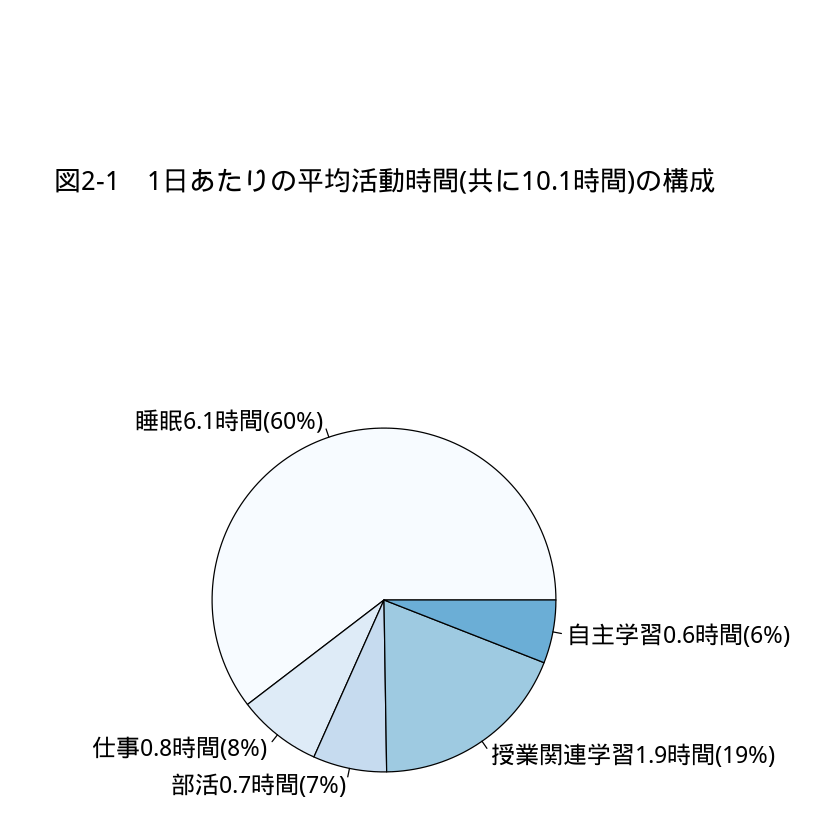

In [ ]:
#図2-1　1日あたりの平均活動時間(共に10.1時間)の構成
slices9<-c(round(mean(data19$sleep),1),round(mean(data19$job)/7,1),round(mean(data19$club)/7,1),round(mean(twork9/7),1),round(mean(tself9/7),1))
lbls9<-c("睡眠","仕事","部活","授業関連学習","自主学習")
par( mar = c(0,0 ,15, 3 ) )
lbls19<-paste(lbls9,"",slices9,"時間(",round(slices9/sum(slices9)*100),"%",")",sep="")
pie(slices9,labels=lbls19,cex=1.5,col=cols,main="図2-1　1日あたりの平均活動時間(共に10.1時間)の構成",family = 'wqy-microhei',cex.main =1.7)

#2.1　睡眠時間
　自己申告された1日あたりの睡眠時間の分布を図2.1-1に示す。記述統計量は、最小値3.0時間、最大値9.0時間、平均値6.1時間、中央値6.0時間である。

（参考）

　同様の調査票を用いて2012年度に青山大学社会情報学部入学生を対象に実施した調査の結果によれば、平均値は5.5時間であった。有意水準5%でウェルチのt検定をして、年度によって1日あたりの睡眠時間に有意な差があるとは言える。

　7年間1日あたりの睡眠時間の人数比率の変化を図2.1-2に示す。大きな変化の中で、今回（2019年度）の睡眠時間は「4時間」が3.8%，「5時間」が17.9%であり、前回（2012年度）の結果は「4時間」が15.1%、「5時間」が27.7%、「7時間」が9.2%であった。

In [ ]:
#2.1　1日あたりの睡眠時間の要約統計量
summary(data19$sleep)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.00    6.00    6.00    6.08    7.00    9.00 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



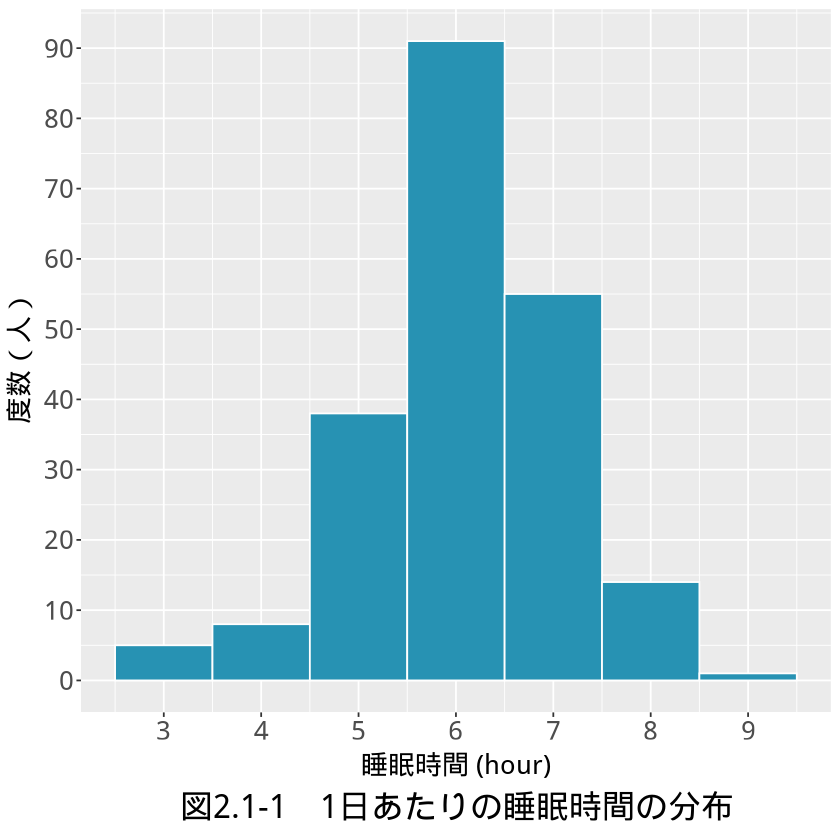

In [ ]:
#図2.1-1　1日あたりの睡眠時間の分布
install.packages( "ggplot2" )
library( ggplot2 )
ggplot(data19,aes(x=sleep))+geom_histogram(color="white",fill="#2792b3",bins=7)+
scale_x_continuous(breaks=seq(0, 10, 1))+scale_y_continuous(breaks=seq(0, 90, 10))+
labs(caption= "図2.1-1　1日あたりの睡眠時間の分布",x="睡眠時間 (hour)",y="度数（人）")+ theme(text = element_text(family = 'wqy-microhei'),plot.caption = element_text(hjust = 0.5,size = 25, face = "bold"),axis.text=element_text(size=20,face = "bold"),axis.title.x=element_text(size=20),axis.title.y=element_text(size=20))

In [ ]:
#2.1　2019年度と2012年度　1日あたりの睡眠時間の要約統計量
summary(data19$sleep)
summary(data12$sleep_day)
t.test( x = data19$sleep, y = data12$sleep_day )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.00    6.00    6.00    6.08    7.00    9.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   5.000   6.000   5.496   6.000  10.000 


	Welch Two Sample t-test

data:  data19$sleep and data12$sleep_day
t = 4.6364, df = 230.91, p-value = 5.934e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.3360453 0.8327355
sample estimates:
mean of x mean of y 
 6.080189  5.495798 



          3           4           5           6           7           8 
0.023584906 0.037735849 0.179245283 0.429245283 0.259433962 0.066037736 
          9 
0.004716981 


          3           4           5           6           7           8 
0.033613445 0.151260504 0.277310924 0.411764706 0.092436975 0.025210084 
         10 
0.008403361 

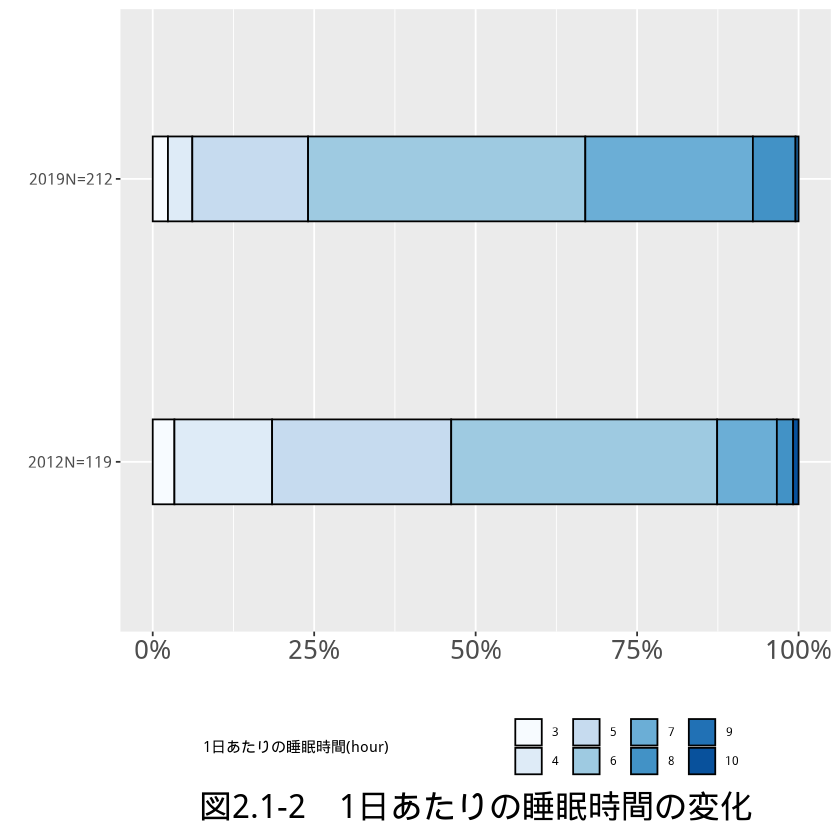

In [ ]:
sleep19 <- prop.table(table(data19$sleep)) 
sleep12 <- prop.table(table(data12$sleep_day)) 
Sleep19 = data.frame(year=2019,sleep19)
Sleep12 = data.frame(year=2012,sleep12)
Sleep= rbind( Sleep19, Sleep12 )
sleep19
sleep12
#図2.1-2　2019年度と2012年度　1日あたりの睡眠時間の比較
library( ggplot2 )
ggplot(Sleep, aes(x=factor(year),y=Freq,fill=Var1)) +
geom_bar(stat = 'identity', position = position_stack(reverse = TRUE),color="black",width=0.3) +
scale_y_continuous(labels = scales::percent) +scale_x_discrete(label = c("2012N=119","2019N=212"))+
theme(text = element_text(family = 'wqy-microhei'),plot.caption = element_text(hjust = 0.5,size = 25, face = "bold"),axis.text.y=element_text(size=12,face = "bold"),axis.text.x=element_text(size=20,face = "bold"),legend.position = "bottom")+
scale_fill_manual(values=cols)+
labs(caption= "図2.1-2　1日あたりの睡眠時間の変化",x="",y="",fill="1日あたりの睡眠時間(hour)")+
coord_flip()

#2.2　アルバイト時間
　1週間あたりのアルバイト時間の分布を図2.2-1に示す。記述統計量は、最小値0.0時間、最大値25.0時間、平均値5.3時間、中央値4.5時間である。ヒストグラムからわかるように、アルバイト時間の分布はかなりいびつなものとなった。1週間あたりのアルバイト時間が0時間という学生（つまり、臨時のアルバイトを除けば、アルバイトをしていないと考えられる）は87人（41％）である。

（参考）

　同様の調査票を用いて2012年度に青山大学社会情報学部入学生を対象に実施した調査の結果によれば、平均値は3.7時間で、中央値は0.0時間であった。有意水準5%でウェルチのt検定をして、年度によって1週間あたりのアルバイト時間に有意な差があるとは言える。

　7年間1週間あたりのアルバイト時間の人数比率の変化を図2.2-2に示す。大きな変化の中で、今回（2019年度）のアルバイト時間は「0時間」が41.0%、「14時間」が2.4%であり、前回（2012年度）の結果は「0時間」が57.1%、「14時間」が0.8%であった。

In [ ]:
#2.2　1週間あたりのアルバイト時間の要約統計量
summary(data19$job)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   4.500   5.259   9.000  25.000 

[1] 87

[1] 0.4103774

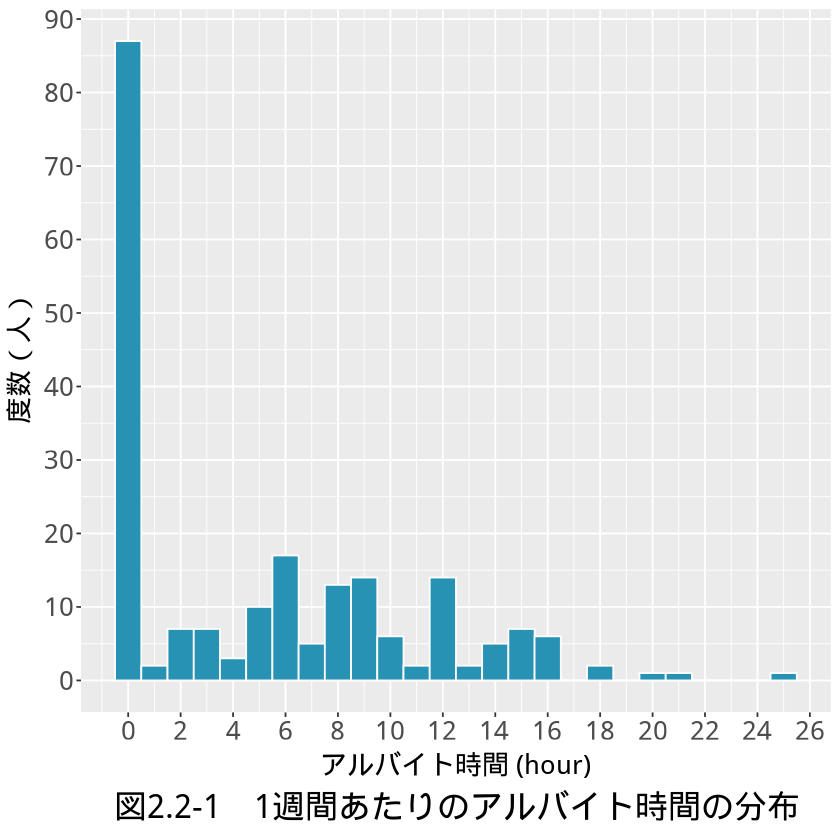

In [ ]:
sum(data19$job==0)
sum(data19$job==0)/212
#図2.2-1　1週間あたりのアルバイト時間の分布
library( ggplot2 )
ggplot(data19,aes(x=job))+geom_histogram(color="white",fill="#2792b3",bins=26)+
scale_x_continuous(breaks=seq(0, 28, 2))+scale_y_continuous(breaks=seq(0, 90, 10))+
labs(caption= "図2.2-1　1週間あたりのアルバイト時間の分布",x="アルバイト時間 (hour)",y="度数（人）")+ theme(text = element_text(family = 'wqy-microhei'),plot.caption = element_text(hjust = 0.5,size = 25, face = "bold"),axis.text=element_text(size=20,face = "bold"),axis.title.x=element_text(size=20),axis.title.y=element_text(size=20))

In [ ]:
#2,2　2019年度と2012年度　1週間あたりのアルバイト時間の要約統計量
summary(data19$job)
summary(data12$job_week)
t.test( x = data19$job, y = data12$job_week )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   4.500   5.259   9.000  25.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   3.655   6.000  30.000 


	Welch Two Sample t-test

data:  data19$job and data12$job_week
t = 2.4452, df = 240.65, p-value = 0.01519
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.3118174 2.8961262
sample estimates:
mean of x mean of y 
 5.259434  3.655462 



          0           1           2           3           4           5 
0.410377358 0.009433962 0.033018868 0.033018868 0.014150943 0.047169811 
          6           7           8           9          10          11 
0.080188679 0.023584906 0.061320755 0.066037736 0.028301887 0.009433962 
         12          13          14          15          16          18 
0.066037736 0.009433962 0.023584906 0.033018868 0.028301887 0.009433962 
         20          21          25 
0.004716981 0.004716981 0.004716981 


          0           1           2           3           4           5 
0.571428571 0.008403361 0.033613445 0.016806723 0.050420168 0.025210084 
          6           7           8           9          10          11 
0.067226891 0.008403361 0.042016807 0.050420168 0.016806723 0.016806723 
         12          13          14          16          17          18 
0.025210084 0.008403361 0.008403361 0.016806723 0.008403361 0.008403361 
         30 
0.016806723 

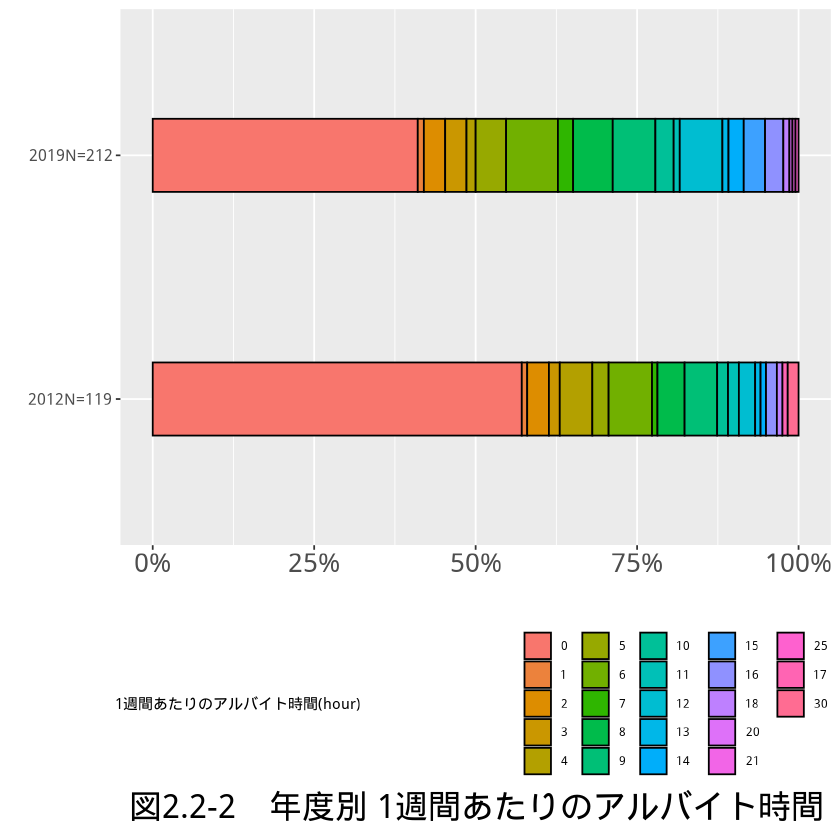

In [ ]:
job19 <- prop.table(table(data19$job)) 
job12 <- prop.table(table(data12$job_week)) 
jobb19 = data.frame(year=2019,job19)
jobb12 = data.frame(year=2012,job12)
Job= rbind( jobb19, jobb12 )
job19
job12
#図2.2-2　2019年度と2012年度 1週間あたりのアルバイト時間の比較
library( ggplot2 )
ggplot(Job, aes(x=factor(year),y=Freq,fill=Var1)) +
geom_bar(stat = 'identity', position = position_stack(reverse = TRUE),color="black",width=0.3) +
scale_y_continuous(labels = scales::percent) +scale_x_discrete(label = c("2012N=119","2019N=212"))+
theme(text = element_text(family = 'wqy-microhei'),plot.caption = element_text(hjust = 0.5,size = 25, face = "bold"),axis.text.y=element_text(size=12,face = "bold"),axis.text.x=element_text(size=20,face = "bold"),legend.position = "bottom")+
labs(caption= "図2.2-2　年度別 1週間あたりのアルバイト時間",x="",y="",fill="1週間あたりのアルバイト時間(hour)")+
coord_flip()

#2.3　部・サークル活動時間
　1週間あたりの部・サークル活動時間の分布を図2.3-1に示す。記述統計量は、最小値0.0時間、最大値48.0時間、平均値4.9時間、中央値3.0時間である。部・サークル活動時間が0時間という学生（おそらくは、部あるいはサークルに所属していない）は49名（23.1％）であり、多くの学生は部・サークル活動時間にいくらかの時間を費やしていた。

（参考）

　同様の調査票を用いて2012年度に青山大学社会情報学部入学生を対象に実施した調査の結果によれば、最大値は25.0時間で、平均値は4.5時間で、中央値は4.0時間であった。有意水準5%でウェルチのt検定をして、年度によって1週間あたりのアルバイト時間に有意な差があるとは言えない。

　7年間1週間あたりの部・サークル活動時間の人数比率の変化を図2.3-2に示す。今回（2019年度）の人数比率は前回（2012年度）の結果とほぼ同じである。

In [ ]:
#2.3　1週間あたりの部・サークル活動時間の要約統計量
summary(data19$club	)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   3.000   4.887   7.000  48.000 

[1] 49

[1] 0.2311321

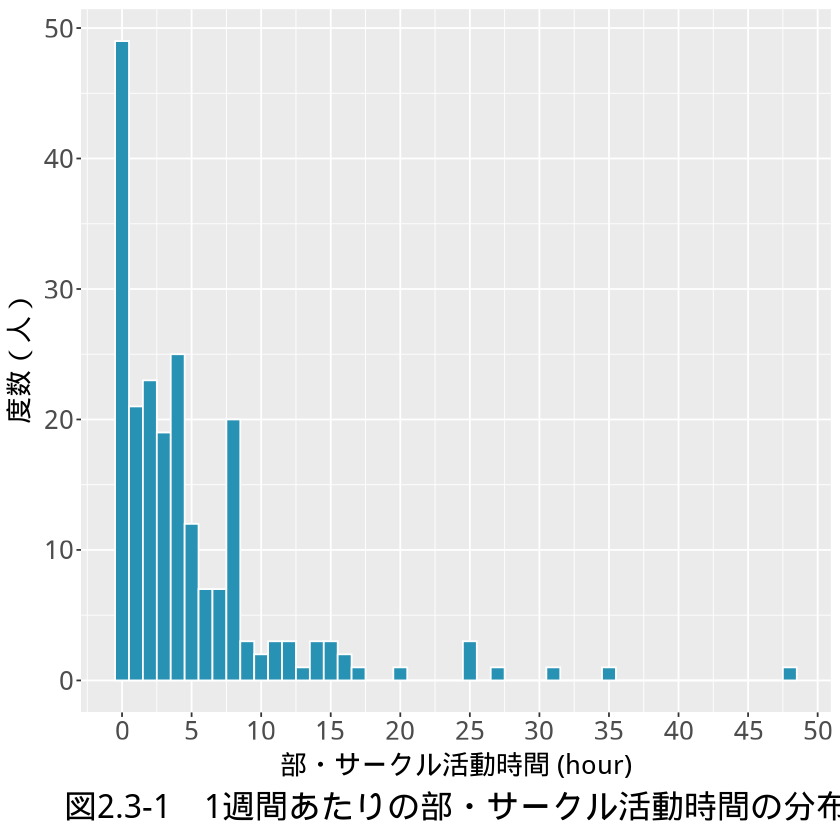

In [ ]:
sum(data19$club==0)
sum(data19$club==0)/212
#図2.3-1　1週間あたりの部・サークル活動時間の分布
library( ggplot2 )
ggplot(data19,aes(x=club))+geom_histogram(color="white",fill="#2792b3",bins=49)+
scale_x_continuous(breaks=seq(0, 50, 5))+scale_y_continuous(breaks=seq(0, 50, 10))+
labs(caption= "図2.3-1　1週間あたりの部・サークル活動時間の分布",x="部・サークル活動時間 (hour)",y="度数（人）")+ theme(text = element_text(family = 'wqy-microhei'),plot.caption = element_text(hjust = 0.5,size = 25, face = "bold"),axis.text=element_text(size=20,face = "bold"),axis.title.x=element_text(size=20),axis.title.y=element_text(size=20))

In [ ]:
#2.3　2019年度と2012年度　部・サークル活動時間の要約統計量
summary(data19$club)
summary(data12$club_week)
t.test( x = data19$club, y = data12$club_week)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   3.000   4.887   7.000  48.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   4.000   4.496   5.000  25.000 


	Welch Two Sample t-test

data:  data19$club and data12$club_week
t = 0.63859, df = 309.96, p-value = 0.5236
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8137426  1.5957309
sample estimates:
mean of x mean of y 
 4.886792  4.495798 


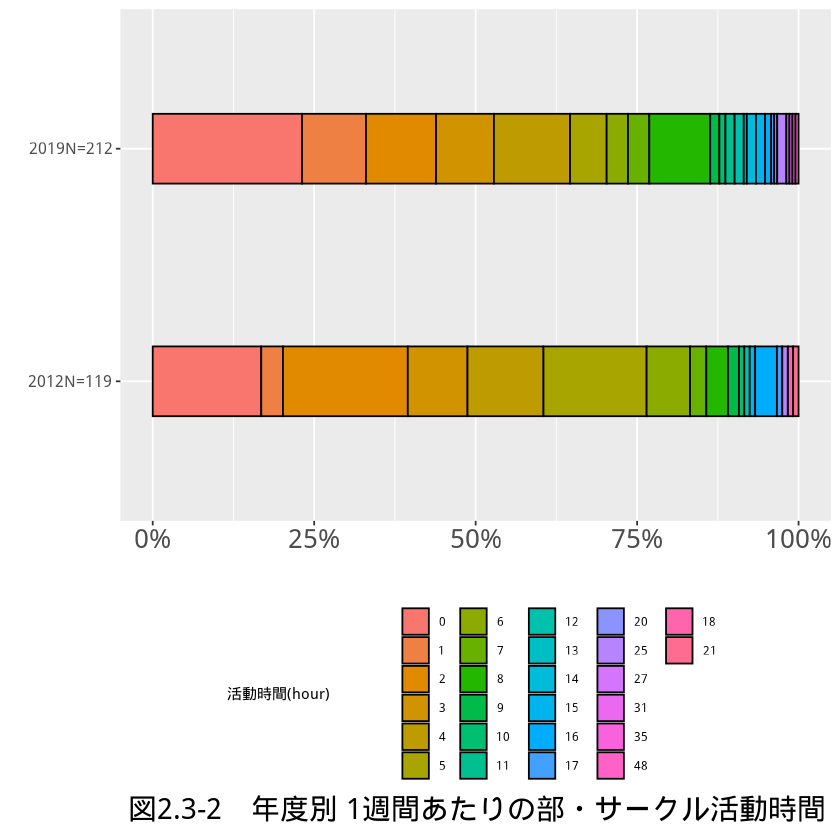

In [ ]:
club19 <- prop.table(table(data19$club)) 
club12 <- prop.table(table(data12$club_week)) 
clubb19 = data.frame(year=2019,club19)
clubb12 = data.frame(year=2012,club12)
Club= rbind( clubb19, clubb12 )

#図2.3-2　2019年度と2012年度 1週間あたりの部・サークル活動時間の比較
library( ggplot2 )
ggplot(Club, aes(x=factor(year),y=Freq,fill=Var1)) +
geom_bar(stat = 'identity', position = position_stack(reverse = TRUE),color="black",width=0.3) +
scale_y_continuous(labels = scales::percent) +scale_x_discrete(label = c("2012N=119","2019N=212"))+
theme(text = element_text(family = 'wqy-microhei'),plot.caption = element_text(hjust = 0.5,size = 22, face = "bold"),axis.text.y=element_text(size=12,face = "bold"),axis.text.x=element_text(size=20,face = "bold"),legend.position = "bottom")+
labs(caption= "図2.3-2　年度別 1週間あたりの部・サークル活動時間",x="",y="",fill="活動時間(hour)")+
coord_flip()

#2.4　授業に関連した学習時間
　青山大学社会情報学部の時間割から、授業と直接に関連した学習（予習、復習、課題）に費やしている時間（1日あたり）の分布を、水曜日以外の平日、水曜日、週末（土曜日と日曜日）の別に、図2.4-1に示す。学習時間は連続量であるが（ただし、選択肢では0.5時間刻み）、3つの曜日カテゴリのデータを同時に示すために、グラフは離散量のように間隔があいている。全体として分布は右に歪んでいる（右すそが長い）。いずれの曜日カテゴリにおいても、およそ三分の一の学生は学習時間が1時間以下であった（水曜日以外の平日88名、水曜日74名、週末66名）。

　平均値を比較すると、授業に関連した水曜日の学習時間（2.1時間）は、それ以外の平日（1.7時間）よりもわずかに長かった。水曜日の学習時間（授業関連）からそれ以外の平日の学習時間を個人ごとに引き、この差の母集団平均がゼロであるという帰無仮説のもとで対応のある平均値の差の検定（有意水準5％、両側検定）を行うと、t(211) = 3.52、p=0.0005となり、学習時間の差は有意であった。また、水曜日の学習時間が他の平日よりも長い学生は55名、同じ学生は55名であった。

　やはり平均値を比較すると、週末1あたりでの授業に関連した学習に費やす時間（2.2時間）よりもわずかに長かった。週末の学習時間（授業関連）から水曜日以外の平日の学習時間を個人ごとに引き、対応のある平均値の差の検定（有意水準5％、両側検定）を行うと、t（211）= 5.15、p=5.8e-07となり、学習時間の差は有意であった。また、週末の学習時間が水曜日以外の平日よりも長い学生は69名、同じ学生は86名であった。

　授業に関連した学習時間を従属変数、学生および曜日を要因（曜日の要因は、水曜日、水曜日以外の平日、週末の3水準）として分散分析を実行すると、これら要因の主効果は有意であった（曜日について、F(2,422)=14.33、p=9.49e-07）。

（参考）

　3つの曜日カテゴリでの授業に関連した学習時間を合計し、１週間での授業に関連した学習時間の人数比率を図2.4-2に示す。2019年度の記述統計量は、最小値0.0時間、最大値35.0時間、平均値13.3時間、中央値12.5時間であり、 2012年度の記述統計量は平均値11.6時間、中央値11.0時間である。ウェルチのt検定をして、有意水準10%で年度によって１週間での授業に関連した学習時間に有意な差があるとは言える。

In [ ]:
#2.4 平日、水曜、週末授業と直接に関連した1日あたりの学習時間の要約統計量
sum(data19$wday_work<=1)
sum(data19$wed_work<=1)
sum(data19$end_work<=1)
summary(data19$wday_work)
summary(data19$wed_work)
summary(data19$end_work)

t.test( x = data19$wed_work-data19$wday_work, mu = 0)
sum(data19$wday_work>data19$wed_work)
sum(data19$wday_work==data19$wed_work)

t.test( x = data19$end_work-data19$wday_work, mu = 0)
sum(data19$end_work>data19$wed_work)
sum(data19$end_work==data19$wed_work)

[1] 88

[1] 74

[1] 66

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   1.500   1.726   2.000   5.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   2.000   2.068   3.000   5.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   2.000   2.182   3.000   5.000 


	One Sample t-test

data:  data19$wed_work - data19$wday_work
t = 3.5211, df = 211, p-value = 0.0005266
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.1505243 0.5334380
sample estimates:
mean of x 
0.3419811 


[1] 55

[1] 55


	One Sample t-test

data:  data19$end_work - data19$wday_work
t = 5.1546, df = 211, p-value = 5.832e-07
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.2811121 0.6292653
sample estimates:
mean of x 
0.4551887 


[1] 69

[1] 86

             Df Sum Sq Mean Sq F value   Pr(>F)    
work19$id   211  838.1   3.972   4.782  < 2e-16 ***
work19$ww     2   23.8  11.906  14.334 9.49e-07 ***
Residuals   422  350.5   0.831                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

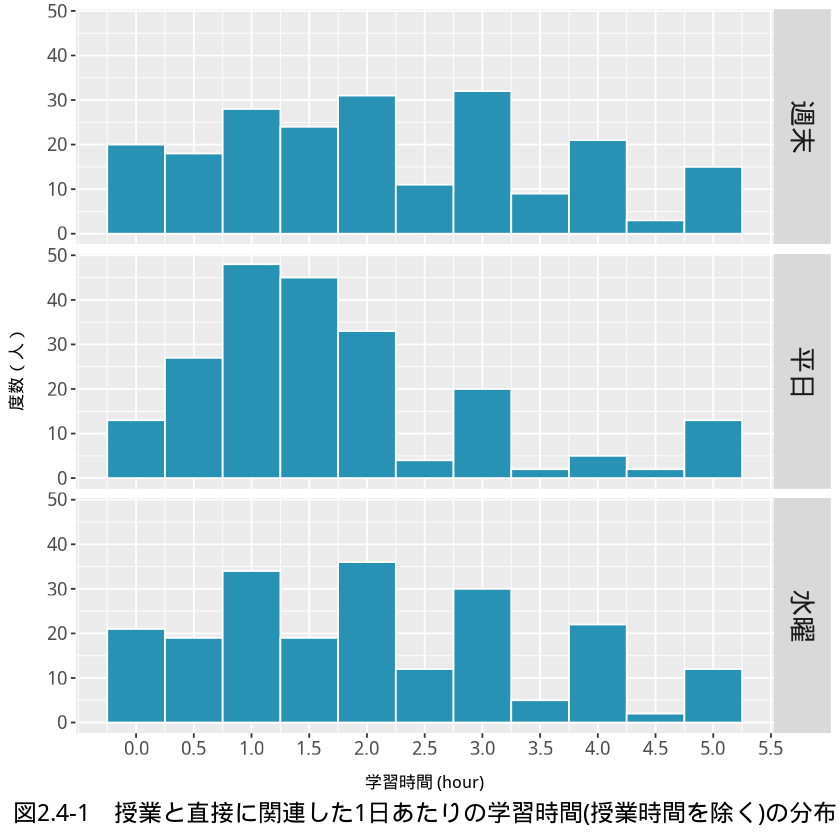

In [ ]:
#2.4　共分散分析
wdaywork=data.frame(year=2019,id=data19$SID,ww="wday_work",work=data19$wday_work)
wedwork=data.frame(year=2019,id=data19$SID,ww="wed_work",work=data19$wed_work)
endwork=data.frame(year=2019,id=data19$SID,ww="end_work",work=data19$end_work)
work19=rbind(wdaywork,wedwork,endwork)
work19$id=factor(work19$id)
work19$ww=factor(work19$ww)
fix_work<-aov(work19$work~work19$id+work19$ww)
summary(fix_work)
#図2.4-1　授業と直接に関連した1日あたりの学習時間(授業時間を除く)の分布
library(ggplot2)
ggplot(work19,aes(x=work))+geom_histogram(color="white",fill="#2792b3",bins=11)+
facet_grid( ww~.,labeller=labeller(ww =c(end_work="週末",wed_work="水曜",wday_work="平日") ))+
scale_x_continuous(breaks=seq(0, 6, 0.5))+
labs(caption= "図2.4-1　授業と直接に関連した1日あたりの学習時間(授業時間を除く)の分布",x="学習時間 (hour)",y="度数（人）")+ theme(text = element_text(family = 'wqy-microhei'),plot.caption = element_text(hjust = 0.5,size = 18, face = "bold"),axis.text=element_text(size=14,face = "bold"),axis.title.x=element_text(size=13),axis.title.y=element_text(size=13),strip.text = element_text(size=20, face="bold"))

In [ ]:
#2.4　 2019年度と2012年度　１週間での授業と直接に関連した学習時間の要約統計量
summary(data19$twork9)
summary(data12$twork2)
t.test( x = data19$twork9,y = data12$twork2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    7.50   12.50   13.34   18.00   35.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    6.00   11.00   11.57   15.75   35.00 


	Welch Two Sample t-test

data:  data19$twork9 and data12$twork2
t = 1.9534, df = 245.91, p-value = 0.05191
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.01477501  3.55484953
sample estimates:
mean of x mean of y 
 13.33726  11.56723 


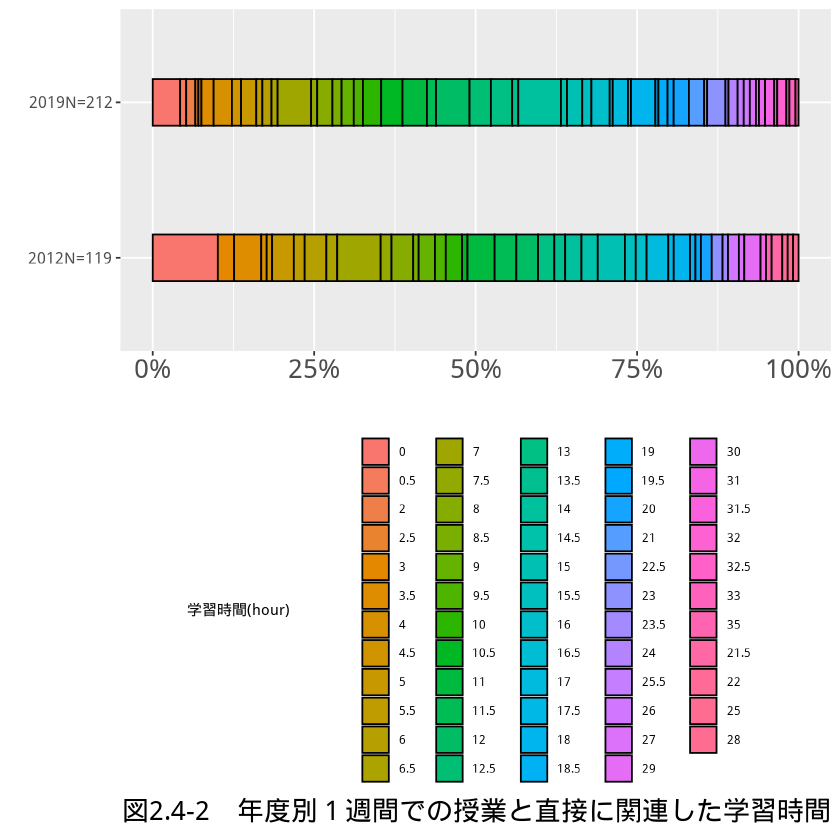

In [ ]:
total_work19 <- prop.table(table(data19$twork9)) 
total_work12 <- prop.table(table(data12$twork2)) 
totalwork19 = data.frame(year=2019,total_work19)
totalwork12 = data.frame(year=2012,total_work12)
Totalwork= rbind( totalwork19, totalwork12 )

#図2.4-2　2019年度と2012年度１週間での授業と直接に関連した学習時間の比較
library( ggplot2 )
ggplot(Totalwork, aes(x=factor(year),y=Freq,fill=Var1)) +geom_bar(stat = 'identity', position = position_stack(reverse = TRUE),color="black",width=0.3) +
scale_y_continuous(labels = scales::percent) +scale_x_discrete(label = c("2012N=119","2019N=212"))+
theme(text = element_text(family = 'wqy-microhei'),plot.caption = element_text(hjust = 0.5,size = 20, face = "bold"),axis.text.y=element_text(size=12,face = "bold"),axis.text.x=element_text(size=20,face = "bold"),legend.position = "bottom")+
labs(caption= "図2.4-2　年度別１週間での授業と直接に関連した学習時間",x="",y="",fill="学習時間(hour)")+
coord_flip()

#2.5　授業と関連のない学習時間
　授業と直接に関連しない学習に費やしている時間（1日あたり）の分布を、水曜日以外の平日、水曜日、週末（土曜日と日曜日）の別に、図2.5-1に示す。図2.4-1と同様に、、3つの曜日カテゴリのデータを同時に示すために、グラフは離散量のように間隔があいている。いずれの曜日カテゴリにおいても、およそ半数の学生は授業と関連のない学習をまったく行っていなかった（水曜日以外の平日112名、水曜日117名、週末116名）。

　授業と直接関連のない学習に費やす時間について、曜日による違いは認められなかった。学生および曜日を要因（曜日の要因は、水曜日、水曜日以外の平日、週末の3水準）として分散分析を実行すると、学生要因の主効果は有意であったが、曜日の主効果は有意ではなかった（F(2,422)=1.17、p=0.31）。

（参考）

　授業と関連のない学習時間について、授業と関連した学習と同様に曜日カテゴリごとの値を合計し、１週間での学習時間とした。こうして計算した、１週間での授業と関連のない学習時間の人数比率を図2.5-2に示す。2019年度の記述統計量は、最小値0.0時間、最大値35.0時間、平均値4.0時間、中央値1.8時間であり、 2012年度の記述統計量は最大値29.0時間、平均値3.5時間、中央値0.0時間である。ウェルチのt検定をして、年度によって１週間での授業に関連した学習時間に有意な差があるとは言えない。


In [ ]:
#2.5 平日、水曜、週末で授業と直接に関連のない1日あたりの学習時間の要約統計量
sum(data19$wday_self==0)
sum(data19$wed_self==0)
sum(data19$end_self==0)

summary(data19$wday_self)
summary(data19$wed_self)
summary(data19$end_self)

[1] 112

[1] 117

[1] 116

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.5472  1.0000  5.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   0.566   1.000   5.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.6179  1.0000  5.0000 

             Df Sum Sq Mean Sq F value Pr(>F)    
self19$id   211  430.9  2.0421   8.427 <2e-16 ***
self19$ss     2    0.6  0.2846   1.174   0.31    
Residuals   422  102.3  0.2423                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

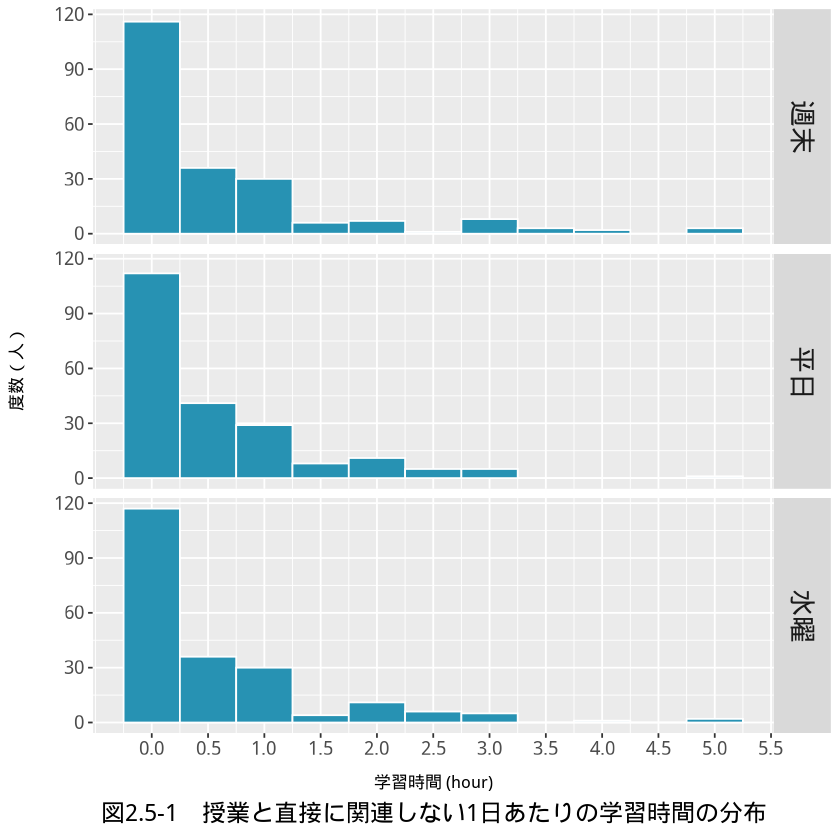

In [ ]:
#2.5　共分散分析
wdayself=data.frame(year=2019,id=data19$SID,ss="wday_self",self=data19$wday_self)
wedself=data.frame(year=2019,id=data19$SID,ss="wed_self",self=data19$wed_self)
endself=data.frame(year=2019,id=data19$SID,ss="end_self",self=data19$end_self)
self19=rbind(wdayself,wedself,endself)
self19$id=factor(self19$id)
self19$ss=factor(self19$ss)
fix_self<-aov(self19$self~self19$id+self19$ss)
summary(fix_self)

#図2.5-1　平日、水曜、週末で授業と直接に関連しない1日あたりの学習時間の分布
library(ggplot2)
ggplot(self19,aes(x=self))+geom_histogram(color="white",fill="#2792b3",bins=11)+
facet_grid( ss~.,labeller=labeller(ss =c(end_self="週末",wed_self="水曜",wday_self="平日") ))+
scale_x_continuous(breaks=seq(0, 6, 0.5))+
labs(caption= "図2.5-1　授業と直接に関連しない1日あたりの学習時間の分布",x="学習時間 (hour)",y="度数（人）")+ theme(text = element_text(family = 'wqy-microhei'),plot.caption = element_text(hjust = 0.5,size = 18, face = "bold"),axis.text=element_text(size=14,face = "bold"),axis.title.x=element_text(size=13),axis.title.y=element_text(size=13),strip.text = element_text(size=20, face="bold"))

In [ ]:
#2.5　 2019年度と2012年度　１週間での授業と直接に関連しないの学習時間の要約統計量
summary(data19$tself9)
summary(data12$tself2)
t.test( x = data19$tself9,y = data12$tself2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   1.750   3.991   6.000  35.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   3.458   4.750  29.000 


	Welch Two Sample t-test

data:  data19$tself9 and data12$tself2
t = 0.83444, df = 245.84, p-value = 0.4048
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.7245556  1.7897213
sample estimates:
mean of x mean of y 
 3.990566  3.457983 


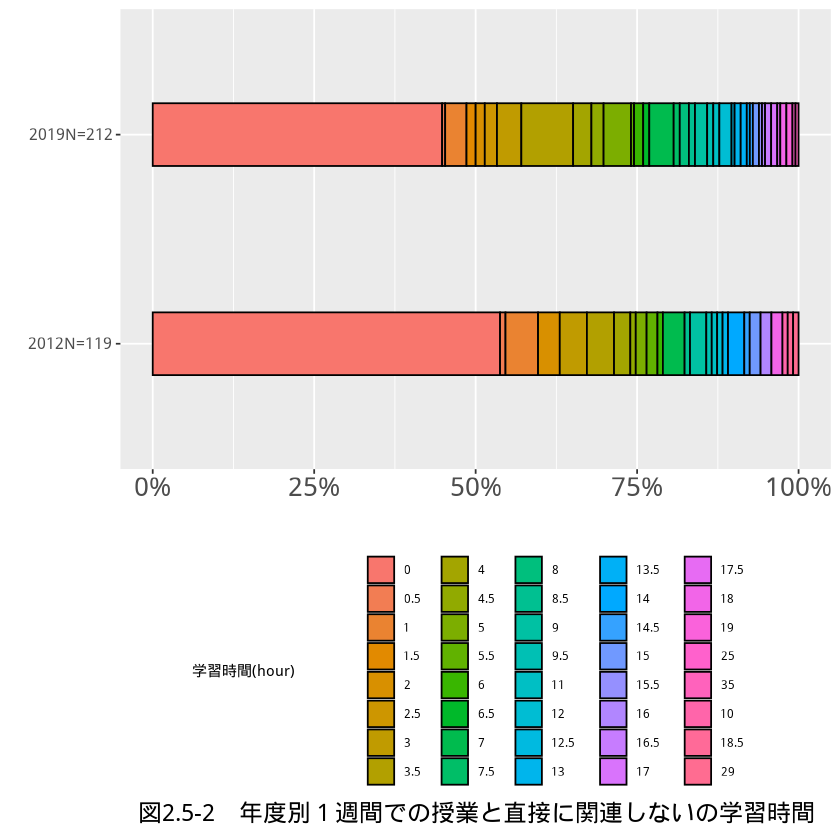

In [ ]:
total_self19 <- prop.table(table(data19$tself9)) 
total_self12 <- prop.table(table(data12$tself2)) 
totalself19 = data.frame(year=2019,total_self19)
totalself12 = data.frame(year=2012,total_self12)
Totalself= rbind( totalself19, totalself12 )

#図2.5-2　2019年度と2012年度１週間での授業と直接に関連しないの学習時間の比較
library( ggplot2 )
ggplot(Totalself, aes(x=factor(year),y=Freq,fill=Var1)) +geom_bar(stat = 'identity', position = position_stack(reverse = TRUE),color="black",width=0.3) +
scale_y_continuous(labels = scales::percent) +scale_x_discrete(label = c("2012N=119","2019N=212"))+
theme(text = element_text(family = 'wqy-microhei'),plot.caption = element_text(hjust = 0.5,size = 18, face = "bold"),axis.text.y=element_text(size=12,face = "bold"),axis.text.x=element_text(size=20,face = "bold"),legend.position = "bottom")+
labs(caption= "図2.5-2　年度別１週間での授業と直接に関連しないの学習時間",x="",y="",fill="学習時間(hour)")+
coord_flip()

#2.6　1日の学習時間
　3つの曜日カテゴリ（水曜日以外の平日、水曜日、週末）ごとに、授業に関連した学習時間と、授業と関連のない学習時間を個人ごとに合計して、1日あたりの学習時間（授業時間を除く）とした。この学習時間の分布を図2.6-1に示す。全体として分布は右に歪んでいる。いずれの曜日カテゴリにおいても、およそ半数の学生は学習時間が2時間以下であった（水曜日以外の平日134名、水曜日105名、週末96名）。

　学生および曜日を要因（曜日の要因は、水曜日、水曜日以外の平日、週末の3水準）として分散分析を実行すると、これら要因の主効果は有意であった（曜日について、F(2,422)=12.55、p=5.09e-06）。
 
　授業時間以外に必要な学習時間は1日あたりおよそ5時間と考えられるので、5時間以上、および、4時間以上の学習を行っている学生の割合を計算した。水曜日以外の平日では、4時間以上の学習を行っている学生は39名（18.4%）、5時間以上の学習を行っている学生は25名（11.8%）であった。水曜日には、4時間以上の学習を行っている学生は59名（27.8%）、5時間以上の学習を行っている学生は34名（16.0%）であった。週末では、時間以上の学習を行っている学生は62名（29.2%）、5時間以上の学習を行っている学生は35名（16.5%）であった。

（参考）

　3つの曜日カテゴリでの学習時間を合計し、１日あたりの学習時間の人数比率を図2.6-2に示す。2019年度の記述統計量は、最小値0.0時間、最大値8.5時間、平均値2.5時間、中央値2.0時間であり、 2012年度の記述統計量は平均値2.1時間である。ウェルチのt検定をして、有意水準10%で年度によって１週間での授業に関連した学習時間に有意な差があるとは言える。 


In [ ]:
#2.6 平日、水曜、週末で1日あたりの学習時間の要約統計
wday=data.frame(year=2019,id=data9$SID,wd="wday",work=data9$wday_work+data9$wday_self)
wed=data.frame(year=2019,id=data9$SID,wd="wed",work=data9$wed_work+data9$wed_self)
end=data.frame(year=2019,id=data9$SID,wd="end",work=data9$end_work+data9$end_self)
dwork19=rbind(wday,wed,end)
sum(wday$work<=2)
sum(wed$work<=2)
sum(end$work<=2)

summary(wday$work)
summary(wed$work)
summary(end$work)
#2.6　共分散分析
dwork19$id=factor(dwork19$id)
dwork19$wd=factor(dwork19$wd)
fix<-aov(dwork19$work~dwork19$id+dwork19$wd)
summary(fix)

sum(wday$work>=4)/212
sum(wday$work>=5)/212
sum(wed$work>=4)/212
sum(wed$work>=5)/212
sum(end$work>=4)/212
sum(end$work>=5)/212

[1] 134

[1] 105

[1] 96

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   2.000   2.274   3.000   8.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   2.500   2.634   4.000   8.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     1.5     2.5     2.8     4.0    10.0 

             Df Sum Sq Mean Sq F value   Pr(>F)    
dwork19$id  211 1602.5   7.595   6.213  < 2e-16 ***
dwork19$wd    2   30.7  15.338  12.548 5.09e-06 ***
Residuals   422  515.8   1.222                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] 0.1839623

[1] 0.1179245

[1] 0.2783019

[1] 0.1603774

[1] 0.2924528

[1] 0.1650943

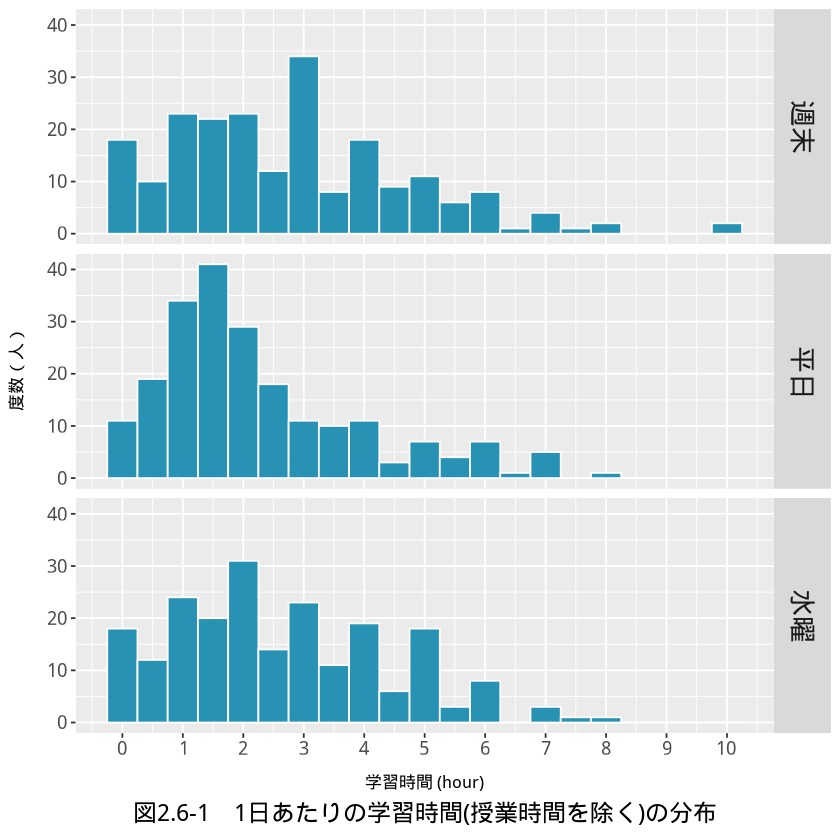

In [ ]:
#図2.6-1　平日、水曜、週末で1日あたりの学習時間の分布
library(ggplot2)
ggplot(dwork19,aes(x=work))+geom_histogram(color="white",fill="#2792b3",bins=21)+
facet_grid( wd~.,labeller=labeller(wd =c(end="週末",wed="水曜",wday="平日") ))+
scale_x_continuous(breaks=seq(0, 11))+
labs(caption= "図2.6-1　1日あたりの学習時間(授業時間を除く)の分布",x="学習時間 (hour)",y="度数（人）")+ theme(text = element_text(family = 'wqy-microhei'),plot.caption = element_text(hjust = 0.5,size = 18, face = "bold"),axis.text=element_text(size=14,face = "bold"),axis.title.x=element_text(size=13),axis.title.y=element_text(size=13),strip.text = element_text(size=20, face="bold"))

In [ ]:
#2.6　 2019年度と2012年度　1日あたりの学習時間の要約統計量
summary(data19$dw9)
summary(data12$dw2)
t.test( x = data19$dw9,y = data12$dw2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.500   2.000   2.472   3.500   8.500 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   2.000   2.139   3.000   8.500 


	Welch Two Sample t-test

data:  data19$dw9 and data12$dw2
t = 1.8519, df = 246.93, p-value = 0.06524
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.02117458  0.68725988
sample estimates:
mean of x mean of y 
 2.471698  2.138655 


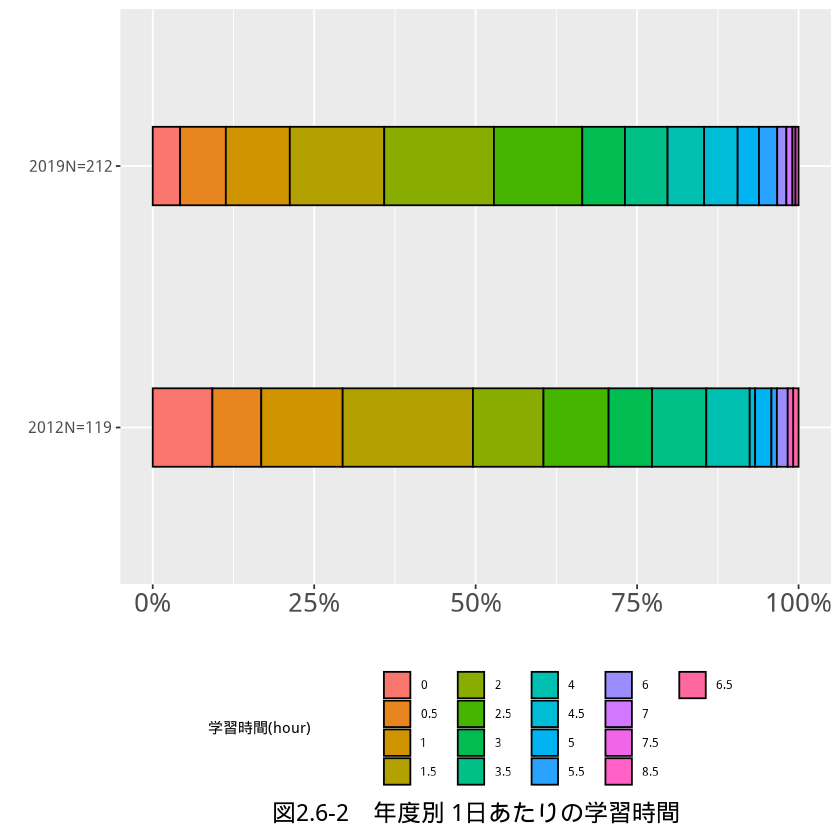

In [ ]:
dwork9 <- prop.table(table(data19$dw9))
dwork2 <- prop.table(table(data12$dw2))
dwork19 = data.frame(year=2019,dwork9)
dwork12 = data.frame(year=2012,dwork2)
Dwork= rbind( dwork19, dwork12 )
#図2.6-2　2019年度と2012年度 1日あたりの学習時間の比較
library( ggplot2 )
ggplot(Dwork, aes(x=factor(year),y=Freq,fill=Var1)) +geom_bar(stat = 'identity', position = position_stack(reverse = TRUE),color="black",width=0.3) +
scale_y_continuous(labels = scales::percent) +scale_x_discrete(label = c("2012N=119","2019N=212"))+
theme(text = element_text(family = 'wqy-microhei'),plot.caption = element_text(hjust = 0.5,size = 18, face = "bold"),axis.text.y=element_text(size=12,face = "bold"),axis.text.x=element_text(size=20,face = "bold"),legend.position = "bottom")+
labs(caption= "図2.6-2　年度別 1日あたりの学習時間",x="",y="",fill="学習時間(hour)")+
coord_flip()

#2.7　社会情報学部への総合的な満足
　社会情報学部への総合的な満足は、「社会情報学部に入学してよかったと思う」（満足1）および「後輩に社会情報学部を勧めたい」（満足2）という、2つの項目によって測定された。回答は、6件法での「まったくそう思わない」を1点として、以下1点刻みで、「非常にそう思う」を6点とした。これら2項目での得点の散布図を図2.7-1に示す。これらの2項目の得点の相関は高く、r=0.68であった。円の面積は頻数に対応している。

（参考）

　年度別満足度を測定する2項目の人数頻度の変化を図2.7-2に示す。2019年度の記述統計量は、満足１の平均値4.5、満足2の平均値4.1であり、 2012年度の記述統計量は満足１の平均値3.6、満足2の平均値3.0である。大きな変化の中で、2右上の円の面積は大きくなる。

 

In [ ]:
#2.7 社会情報学部への満足度を測定する2項目の要約統計量
summary(data9$total1)
summary(data9$total2)
cor( x = data9$total1, y = data9$total2, method = "spearman" )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   4.000   5.000   4.528   5.000   6.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    3.00    4.00    4.08    5.00    6.00 

[1] 0.6798438

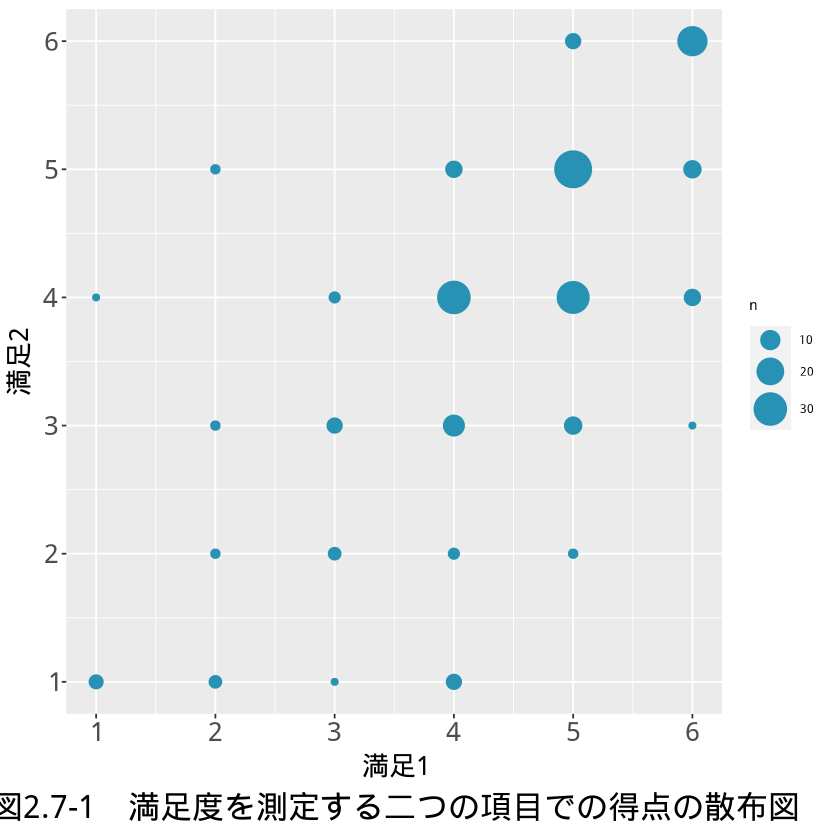

In [ ]:
#図2.7-1　満足度を測定する二つの項目での得点の散布図
library( ggplot2 )
ggplot(data9, aes(x=total1,y=total2)) +geom_count(color="#2792b3")+
 scale_size_area(max_size = 10)+
 scale_x_continuous(breaks=seq(0, 6, 1))+scale_y_continuous(breaks=seq(0, 6, 1))+
 labs(caption= "図2.7-1　満足度を測定する二つの項目での得点の散布図",x="満足1",y="満足2")+ theme(text = element_text(family = 'wqy-microhei'),plot.caption = element_text(hjust = 0.5,size = 24, face = "bold"),axis.text=element_text(size=20,face = "bold"),axis.title.x=element_text(size=20),axis.title.y=element_text(size=20))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   4.000   3.571   4.000   6.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       2       3       3       4       6 

   
              1           2           3           4           5           6
  1 0.023584906 0.000000000 0.000000000 0.004716981 0.000000000 0.000000000
  2 0.018867925 0.009433962 0.009433962 0.000000000 0.009433962 0.000000000
  3 0.004716981 0.018867925 0.028301887 0.014150943 0.000000000 0.000000000
  4 0.028301887 0.014150943 0.056603774 0.141509434 0.033018868 0.000000000
  5 0.000000000 0.009433962 0.037735849 0.136792453 0.183962264 0.028301887
  6 0.000000000 0.000000000 0.004716981 0.033018868 0.037735849 0.113207547

   
              1           2           3           4           5           6
  1 0.075630252 0.008403361 0.008403361 0.000000000 0.000000000 0.000000000
  2 0.042016807 0.058823529 0.000000000 0.000000000 0.000000000 0.000000000
  3 0.033613445 0.075630252 0.100840336 0.008403361 0.000000000 0.000000000
  4 0.025210084 0.016806723 0.100840336 0.184873950 0.008403361 0.008403361
  5 0.008403361 0.008403361 0.025210084 0.092436975 0.075630252 0.008403361
  6 0.008403361 0.000000000 0.000000000 0.000000000 0.000000000 0.016806723

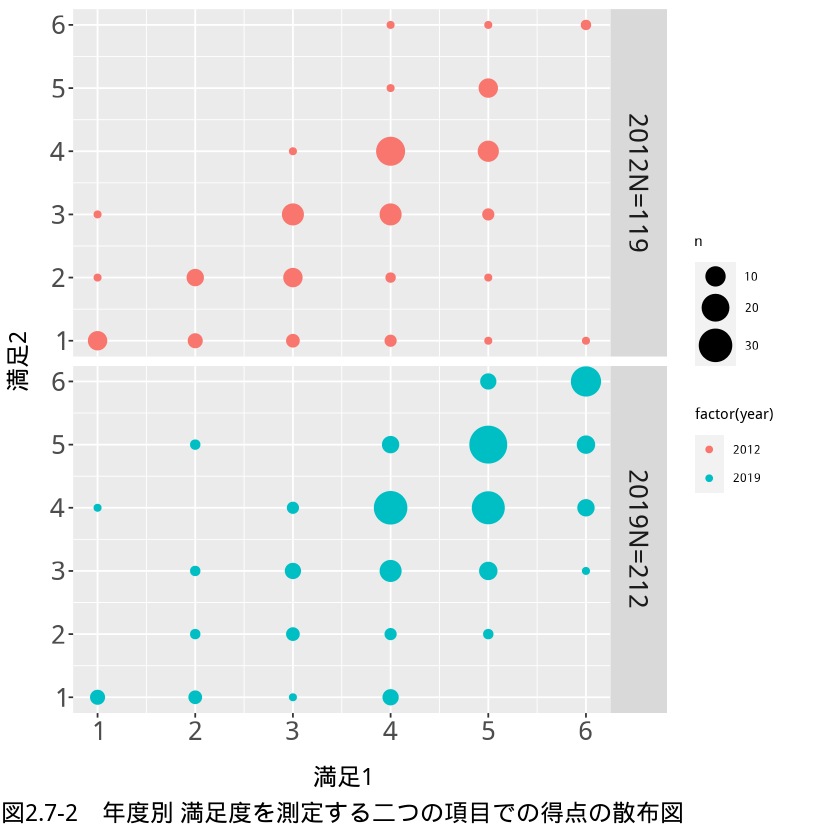

In [ ]:
summary(data2$satisfy_1)
summary(data2$satisfy_2)

satis9 <- prop.table(table(data9$total1,data9$total2)) 
satis2 <- prop.table(table(data2$satisfy_1,data2$satisfy_2)) 
satis9
satis2
satis19=data.frame(year="2019",satisfy1=data9$total1,satisfy2=data9$total2)
satis12=data.frame(year="2012",satisfy1=data2$satisfy_1,satisfy2=data2$satisfy_2)
Satis= rbind( satis19, satis12 )
#図2.7-2　2019年度と2012年度 満足度の比較
library( ggplot2 )
ggplot(Satis, aes(satisfy1,satisfy2, colour = factor(year)))+
facet_grid( year~.,labeller=labeller(year =c("2019"="2019N=212","2012"="2012N=119") ))+
geom_count(aes(colour = factor(year)))+
scale_size_area(max_size = 10)+
scale_x_continuous(breaks=seq(0, 6, 1))+scale_y_continuous(breaks=seq(0, 6, 1))+
labs(caption= "図2.7-2　年度別 満足度を測定する二つの項目での得点の散布図",x="満足1",y="満足2")+ theme(text = element_text(family = 'wqy-microhei'),plot.caption = element_text(hjust = 0.5,size = 18, face = "bold"),axis.text=element_text(size=20,face = "bold"),axis.title.x=element_text(size=18),axis.title.y=element_text(size=18),strip.text = element_text(size=20, face="bold"))

#2.8　変数関の相関
　すべての変数の相関係数を図2.8-2に示す。

　授業以外での学習に関する6項目は、相互に正の相関が認められた。授業に関連しない学習を示す3つの項目間の相関は、平日自主と水曜自主で0.69、平日自主と週末自主で0.65、水曜自主と週末自主で0.81であった。授業に関連した学習時間を示す3つの項目間の相関は、平日授業と水曜授業で0.44、平日授業と週末授業で0.55、水曜授業と週末授業で0.67であった。これらの相関係数より比較的小さいが、授業に関連した学習時間と関連のない学習時間の間でも、やはり正の相関が得られた。

　学習時間とトレードオフの関係にあると考えられる変数（睡眠時間、アルバイトの時間、部・サークル活動の時間）は、一般に学習時間の変数と負の相関を示したが（正の相関が6、負の相関が12）、その値はあまり大きくなかった。絶対値でもっとも大きな負の相関は、部活と水曜授業の-0.17、部活と週末授業の-0.17であった。その他の相関係数の絶対値は0.15以下であった。トレードオフ関係はわずかに認められるが、非常に弱いといえる。

　社会情報学部への総合的な満足度を測定する2項目（満足1、満足2）と、学習時間および他の変数との関係係数は、絶対値で0.00から0.27の範囲であり、小さな値であった。その中で比較的大きな値であったのは、水曜授業と満足1が0.27、水曜授業と満足2が0.20であった。

（参考）

　2012年度の学習時間および関連する変数の相関行列を図2.8-3に示す。今回（2019年度）の相関関係は前回（2012年度）の結果とほぼ同じである。ただし、今回で週末授業と睡眠が-0.10、前回で週末授業と睡眠が-0.32であった。7年間授業に関連しない学習を示す3つの項目間の相関関係が大きくなった。

,睡眠,仕事,部活,平日授業,平日自主,水曜授業,水曜自主,週末授業,週末自主,満足1,満足2
睡眠,1.00,-0.01,-0.21,-0.11,0.02,-0.08,-0.09,-0.10,-0.04,-0.05,-0.09
仕事,-0.01,1.00,-0.16,0.05,-0.03,0.04,-0.04,0.05,-0.02,0.05,0.03
部活,-0.21,-0.16,1.00,0.01,0.02,-0.17,-0.06,-0.17,-0.13,-0.10,0.03
平日授業,-0.11,0.05,0.01,1.00,0.35,0.44,0.23,0.55,0.28,0.22,0.15
平日自主,0.02,-0.03,0.02,0.35,1.00,0.05,0.69,0.13,0.65,-0.05,0.13
水曜授業,-0.08,0.04,-0.17,0.44,0.05,1.00,0.16,0.67,0.24,0.27,0.20
水曜自主,-0.09,-0.04,-0.06,0.23,0.69,0.16,1.00,0.20,0.81,-0.08,0.09
週末授業,-0.10,0.05,-0.17,0.55,0.13,0.67,0.20,1.00,0.26,0.22,0.14
週末自主,-0.04,-0.02,-0.13,0.28,0.65,0.24,0.81,0.26,1.00,-0.03,0.14
満足1,-0.05,0.05,-0.10,0.22,-0.05,0.27,-0.08,0.22,-0.03,1.00,0.69


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



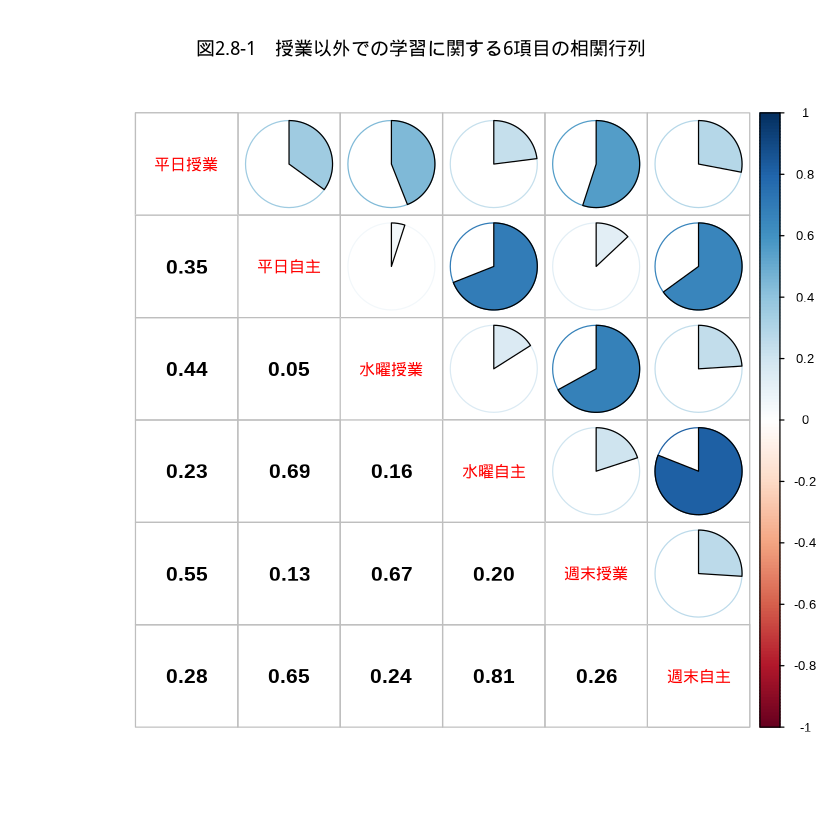

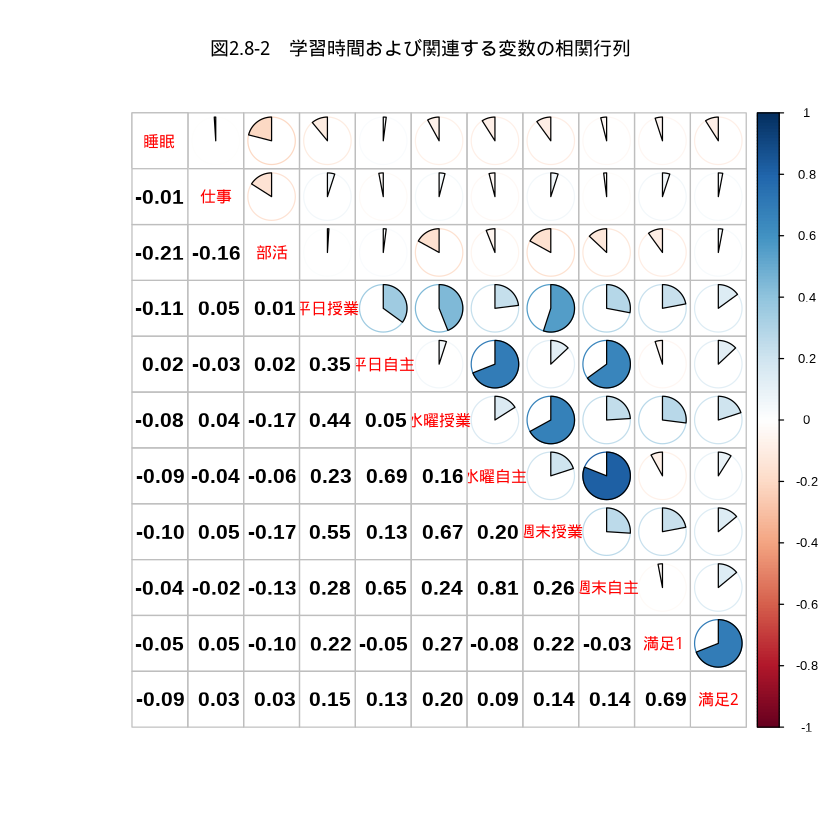

In [ ]:
data99<-data.frame(data9$sleep,data9$job,data9$club,data9$wday_work,data9$wday_self,data9$wed_work,data9$wed_self,data9$end_work,data9$end_self,data9$total1 ,data9$total2)
M19<-round(cor(data99),2)
colnames(M19)<-c("睡眠","仕事","部活","平日授業","平日自主","水曜授業","水曜自主","週末授業","週末自主","満足1","満足2")
rownames(M19)<-c("睡眠","仕事","部活","平日授業","平日自主","水曜授業","水曜自主","週末授業","週末自主","満足1","満足2")
M19

install.packages( "corrplot" )
#図2.8-1　授業以外での学習に関する6項目の相関行列
library(corrplot)
corrplot(corr =M19[4:9,4:9],type="upper",method = 'pie',tl.pos="d",title = "図2.8-1　授業以外での学習に関する6項目の相関行列",mar=c(4, 0, 4,0))
corrplot(corr = M19[4:9,4:9],add=TRUE, type="lower", method="number", number.cex = 1.3,col="black",diag=FALSE,tl.pos="n", cl.pos="n")

#図2.8-2　学習時間および関連する変数の相関行列
library(corrplot)
corrplot(corr =M19,type="upper",method = 'pie',tl.pos="d",title = "図2.8-2　学習時間および関連する変数の相関行列",mar=c(4, 0, 4,0))
corrplot(corr = M19,add=TRUE, type="lower", method="number", number.cex = 1.3,col="black",diag=FALSE,tl.pos="n", cl.pos="n")

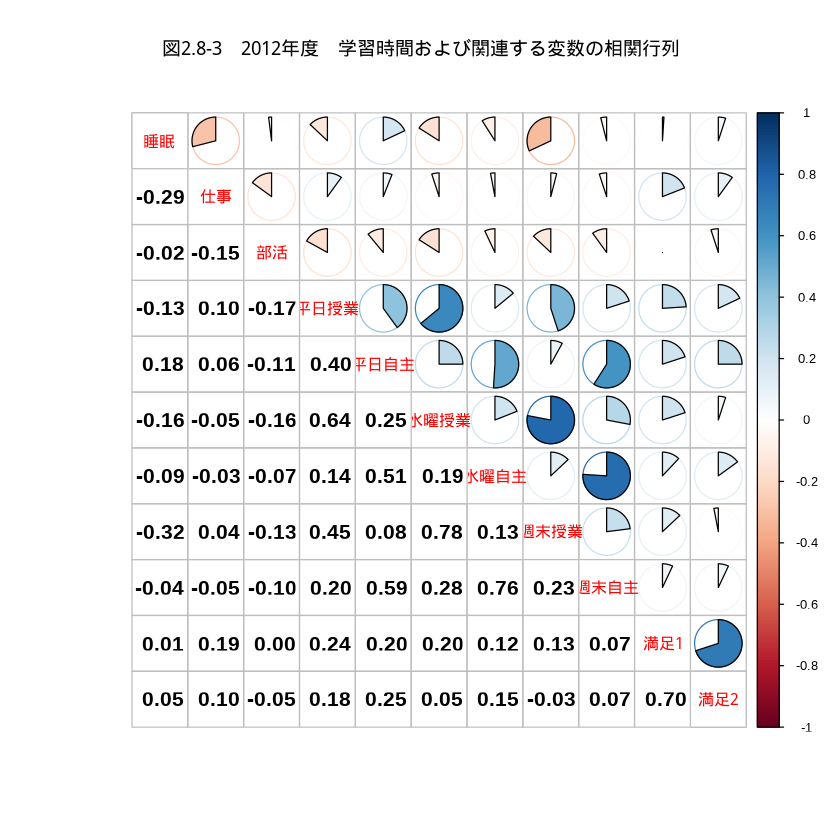

In [ ]:
#図2.8-3　2012年度　学習時間および関連する変数の相関行列
data22<-data.frame(data2$sleep_day,data2$job_week,data2$club_week,data2$wday_work,data2$wday_self,data2$wed_work,data2$wed_self,data2$wend_work,data2$wend_self,data2$satisfy_1,data2$satisfy_2)
M12<-round(cor(data22),2)
colnames(M12)<-c("睡眠","仕事","部活","平日授業","平日自主","水曜授業","水曜自主","週末授業","週末自主","満足1","満足2")
rownames(M12)<-c("睡眠","仕事","部活","平日授業","平日自主","水曜授業","水曜自主","週末授業","週末自主","満足1","満足2")

library(corrplot)
corrplot(corr =M12,type="upper",method = 'pie',tl.pos="d",title = "図2.8-3　2012年度　学習時間および関連する変数の相関行列",mar=c(4, 0, 4,0))
corrplot(corr = M12,add=TRUE, type="lower", method="number", number.cex = 1.3,col="black",diag=FALSE,tl.pos="n", cl.pos="n")

#引用文献
寺尾敦（2012）青山学院大学社会情報学部１年生の学習時間に関する調査，青山社会情報研究Vol.4，p.35-47　

https://www.agulin.aoyama.ac.jp/repo/repository/1000/13070/